<a href="https://colab.research.google.com/github/rfdyning6/rfdyning6.github.io/blob/main/database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install pip --upgrade
!pip install category_encoders

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from matplotlib.ticker import StrMethodFormatter

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 88)
pd.set_option("display.max_rows", 88)

In [10]:
#NEW DATASETS

dd_df=pd.read_csv('https://decko048.github.io/dataset/data_description.csv')
ss_df=pd.read_csv('https://decko048.github.io/dataset/sample_submission.csv')
tr_df=pd.read_csv('https://decko048.github.io/dataset/train.csv', index_col=None, na_values=['nan'])
ts_df=pd.read_csv('https://decko048.github.io/dataset/test.csv',index_col=None, na_values=['nan'])

tr_df[tr_df.isnull().any(axis=1)]
pd.isnull(np.array([np.nan, 0], dtype=object))
pd.isnull(np.array([np.nan, 0], dtype=float))

print('Sample Submission shape :', ss_df.shape)
print('Training  shape :', tr_df.shape)
print('Testing  shape :', ts_df.shape)

Sample Submission shape : (6000, 2)
Training  shape : (11153, 22)
Testing  shape : (6000, 21)


In [11]:
# Change columns name it's contain space
tr_df.rename(columns={'marital_status_maried(Y/N)':'maried_status','annual leave':'annual_leave',
                      'Last_achievement_%':'Last_Achieve','Achievement_above_100%_during3quartal':'Achieve_3quartal',
                      'Best Performance':'Best_Performance'}, inplace=True)
ts_df.rename(columns={'marital_status_maried(Y/N)':'maried_status','annual leave':'annual_leave',
                      'Last_achievement_%':'Last_Achieve','Achievement_above_100%_during3quartal':'Achieve_3quartal'}, inplace=True)

In [12]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   job_level                             11153 non-null  object 
 1   job_duration_in_current_job_level     11153 non-null  float64
 2   person_level                          11153 non-null  object 
 3   job_duration_in_current_person_level  11153 non-null  float64
 4   job_duration_in_current_branch        11153 non-null  float64
 5   Employee_type                         11153 non-null  object 
 6   gender                                11153 non-null  int64  
 7   age                                   11153 non-null  int64  
 8   maried_status                         11153 non-null  object 
 9   number_of_dependences                 11153 non-null  int64  
 10  Education_level                       11153 non-null  object 
 11  GPA            

In [13]:
tr_df = tr_df.fillna(0)
tr_df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,maried_status,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual_leave,sick_leaves,Last_Achieve,Achieve_3quartal,Best_Performance
0,JG04,1.35,PG03,1.35,1.73,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.00,0
1,JG04,1.29,PG03,1.29,1.04,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.00,0
2,JG05,2.57,PG06,2.31,1.78,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.00,0
3,JG05,2.83,PG06,1.00,1.39,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.00,1
4,JG05,2.83,PG06,2.83,0.71,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.00,0


In [14]:
cleanup_nums ={"job_level":{"JG04":4,"JG05":5,"JG03":3},
               "person_level":{"PG03":3,"PG04":4,"PG06":6,"PG05":5,"PG07":7,"PG01":1,"PG02":2,"PG08":8},
               "Employee_type":{"RM_type_A":1,"RM_type_B":2,"RM_type_C":3},
               "maried_status":{"Y":1,"N":2},
               "Education_level":{"level_4":4,"level_3":3,"level_1":1,"level_5":5,"level_2":2,"level_0":6}}

In [16]:
fn_df=tr_df.replace(cleanup_nums).astype('int64')
fn_df = fn_df.fillna(0)
fn_df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,maried_status,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual_leave,sick_leaves,Last_Achieve,Achieve_3quartal,Best_Performance
0,4,1,3,1,1,1,2,1985,1,1,6,2,2011,4,2,3,2,3,0,46,0,0
1,4,1,3,1,1,1,2,1989,1,0,1,7,2007,4,4,3,0,0,1,47,0,0
2,5,2,6,2,1,3,1,1970,1,1,1,0,1989,28,10,9,6,2,1,40,0,0
3,5,2,6,1,1,1,2,1967,1,2,1,0,1987,29,11,6,0,4,10,47,0,1
4,5,2,6,2,0,1,2,1965,1,3,1,7,1985,30,9,8,2,3,0,47,0,0


In [17]:
fn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   job_level                             11153 non-null  int64
 1   job_duration_in_current_job_level     11153 non-null  int64
 2   person_level                          11153 non-null  int64
 3   job_duration_in_current_person_level  11153 non-null  int64
 4   job_duration_in_current_branch        11153 non-null  int64
 5   Employee_type                         11153 non-null  int64
 6   gender                                11153 non-null  int64
 7   age                                   11153 non-null  int64
 8   maried_status                         11153 non-null  int64
 9   number_of_dependences                 11153 non-null  int64
 10  Education_level                       11153 non-null  int64
 11  GPA                                   111

In [18]:
ob_df=tr_df.select_dtypes(include=['object']).copy()
ob_df = ob_df.fillna(0)
ob_df.head()

,job_level,person_level,Employee_type,maried_status,Education_level
0,JG04,PG03,RM_type_A,Y,level_0
1,JG04,PG03,RM_type_A,Y,level_1
2,JG05,PG06,RM_type_C,Y,level_1
3,JG05,PG06,RM_type_A,Y,level_1
4,JG05,PG06,RM_type_A,Y,level_1


In [19]:
ob_df=ob_df.replace(cleanup_nums)
ob_df.head()

,job_level,person_level,Employee_type,maried_status,Education_level
0,4,3,1,1,6
1,4,3,1,1,1
2,5,6,3,1,1
3,5,6,1,1,1
4,5,6,1,1,1


In [20]:
from io import StringIO
col = ['job_level','person_level','Employee_type',
       'Education_level','maried_status','Best_Performance']
cat_df = fn_df[col]
cat_df = cat_df[pd.notnull(fn_df['Best_Performance'])]
cat_df.columns = ['job_level','person_level','Employee_type',
                  'Education_level','maried_status','Best_Performance']

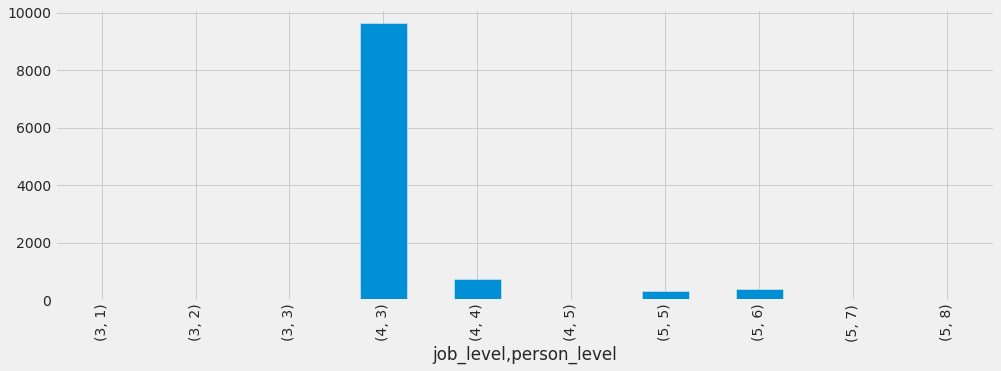

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
cat_df.groupby(['job_level','person_level']).Best_Performance.count().plot.bar(ylim=0)
plt.show()

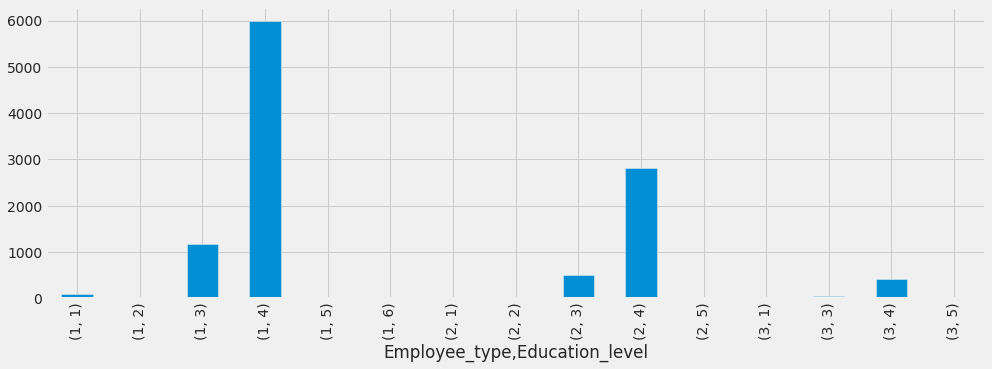

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
cat_df.groupby(['Employee_type','Education_level']).Best_Performance.count().plot.bar(ylim=0)
plt.show()

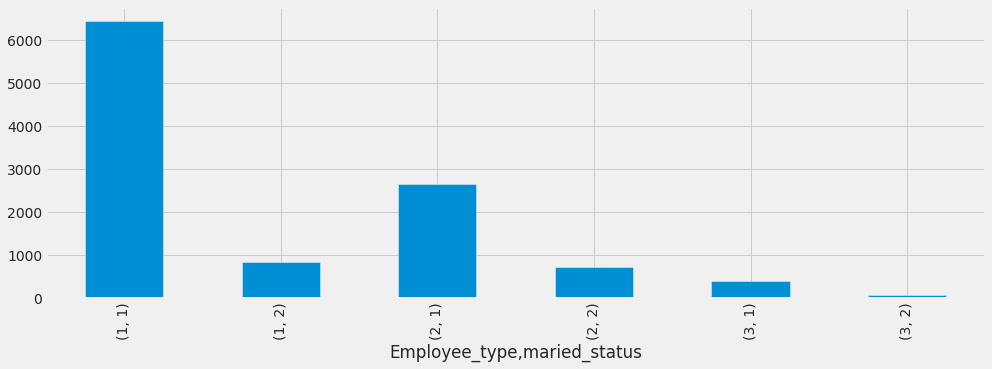

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
cat_df.groupby(['Employee_type','maried_status']).Best_Performance.count().plot.bar(ylim=0)
plt.show()

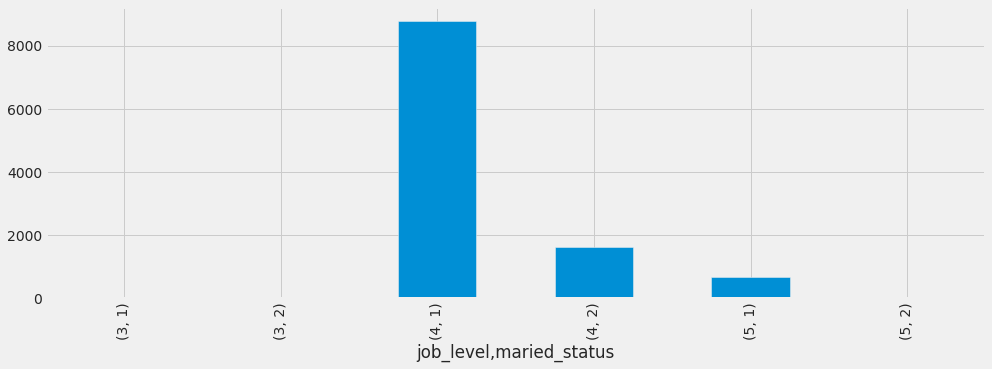

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
cat_df.groupby(['job_level','maried_status']).Best_Performance.count().plot.bar(ylim=0)
plt.show()

In [25]:
from io import StringIO
fcol = ['job_duration_in_current_job_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'GPA', 'Last_Achieve',
       'Achieve_3quartal','Best_Performance']
flo_df = fn_df[fcol]
flo_df = flo_df[pd.notnull(fn_df['Best_Performance'])].astype('int64')
flo_df.columns = ['job_duration_in_current_job_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'GPA', 'Last_Achieve',
       'Achieve_3quartal','Best_Performance']
flo_df.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,GPA,Last_Achieve,Achieve_3quartal,Best_Performance
0,1,1,1,2,46,0,0
1,1,1,1,7,47,0,0
2,2,2,1,0,40,0,0
3,2,1,1,0,47,0,1
4,2,2,0,7,47,0,0


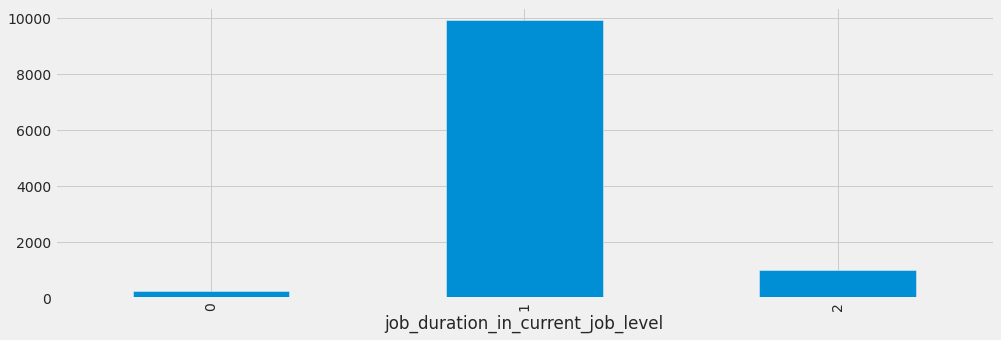

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
flo_df.groupby(['job_duration_in_current_job_level']).Best_Performance.count().plot.bar(ylim=0)
plt.show()

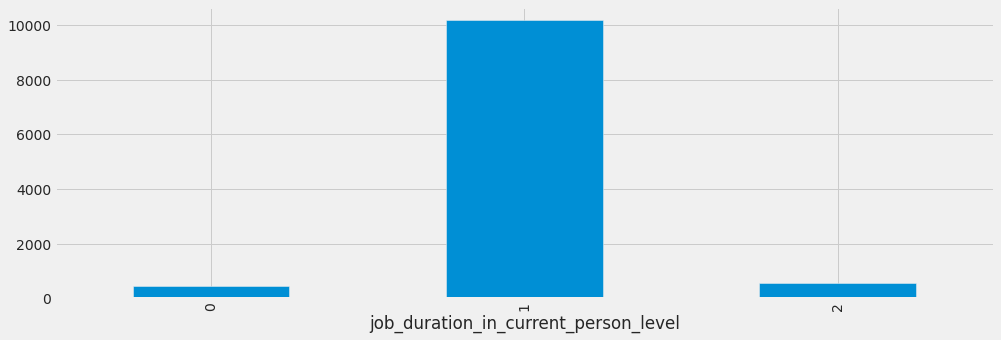

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
flo_df.groupby(['job_duration_in_current_person_level']).Best_Performance.count().plot.bar(ylim=0)
plt.show()

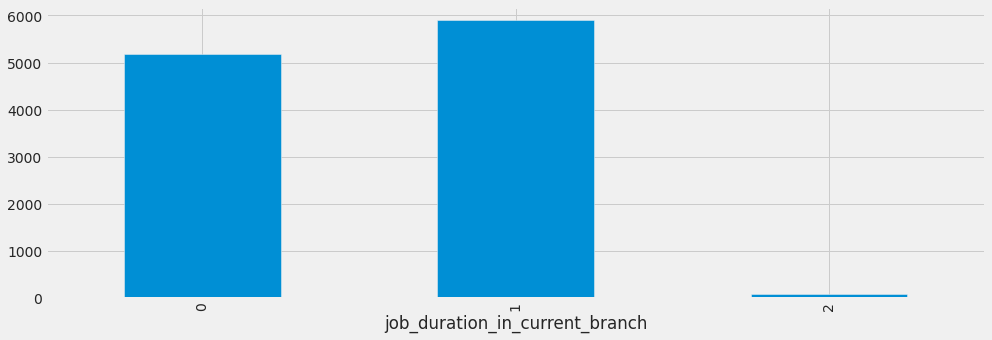

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
flo_df.groupby(['job_duration_in_current_branch']).Best_Performance.count().plot.bar(ylim=0)
plt.show()

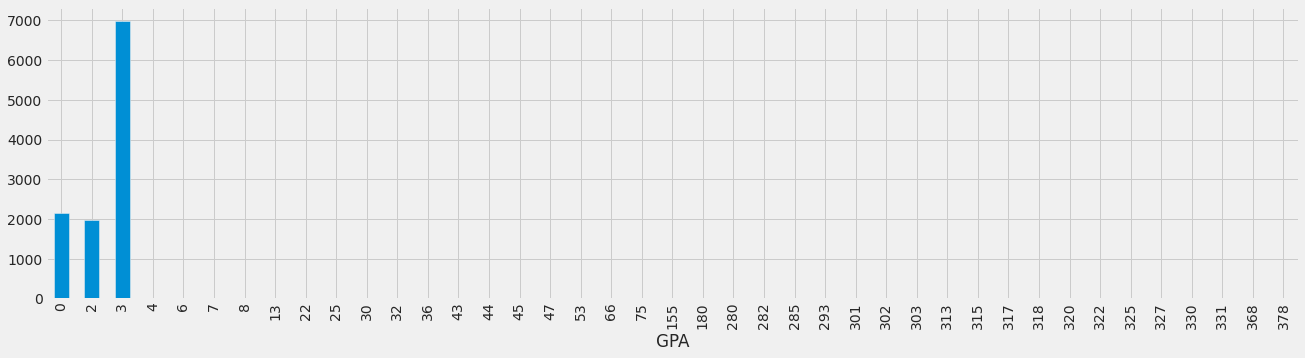

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,5))
flo_df.groupby(['GPA']).Best_Performance.count().plot.bar(ylim=0)
plt.show()

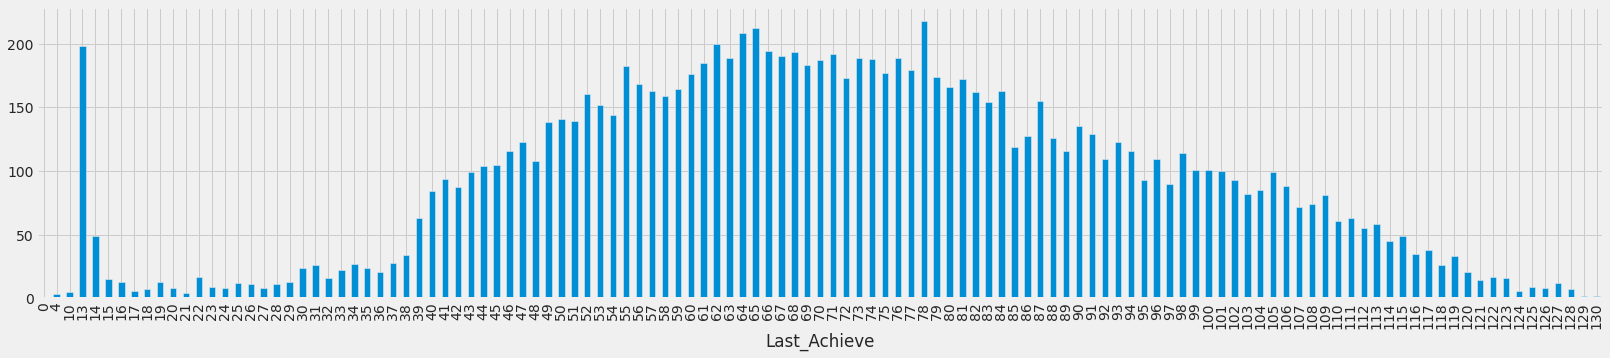

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,5))
flo_df.groupby(['Last_Achieve']).Best_Performance.count().plot.bar(ylim=0)
plt.show()

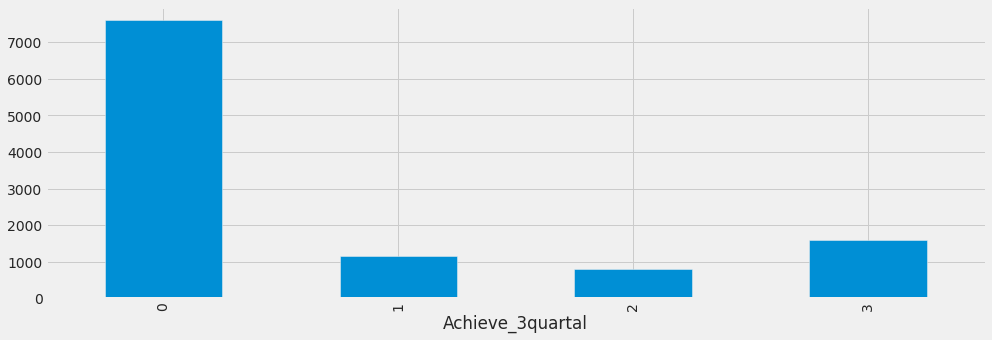

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
flo_df.groupby(['Achieve_3quartal']).Best_Performance.count().plot.bar(ylim=0)
plt.show()

In [32]:
fn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
job_level,11153.00,4.06,0.25,3.00,4.00,4.00,4.00,5.00
job_duration_in_current_job_level,11153.00,1.07,0.33,0.00,1.00,1.00,1.00,2.00
person_level,11153.00,3.23,0.69,1.00,3.00,3.00,3.00,8.00
job_duration_in_current_person_level,11153.00,1.01,0.30,0.00,1.00,1.00,1.00,2.00
job_duration_in_current_branch,11153.00,0.54,0.51,0.00,0.00,1.00,1.00,2.00
Employee_type,11153.00,1.39,0.57,1.00,1.00,1.00,2.00,3.00
gender,11153.00,1.74,0.44,1.00,1.00,2.00,2.00,2.00
age,11153.00,1985.84,4.63,1963.00,1985.00,1987.00,1989.00,1997.00
maried_status,11153.00,1.15,0.36,1.00,1.00,1.00,1.00,2.00
number_of_dependences,11153.00,1.00,0.88,0.00,0.00,1.00,2.00,7.00


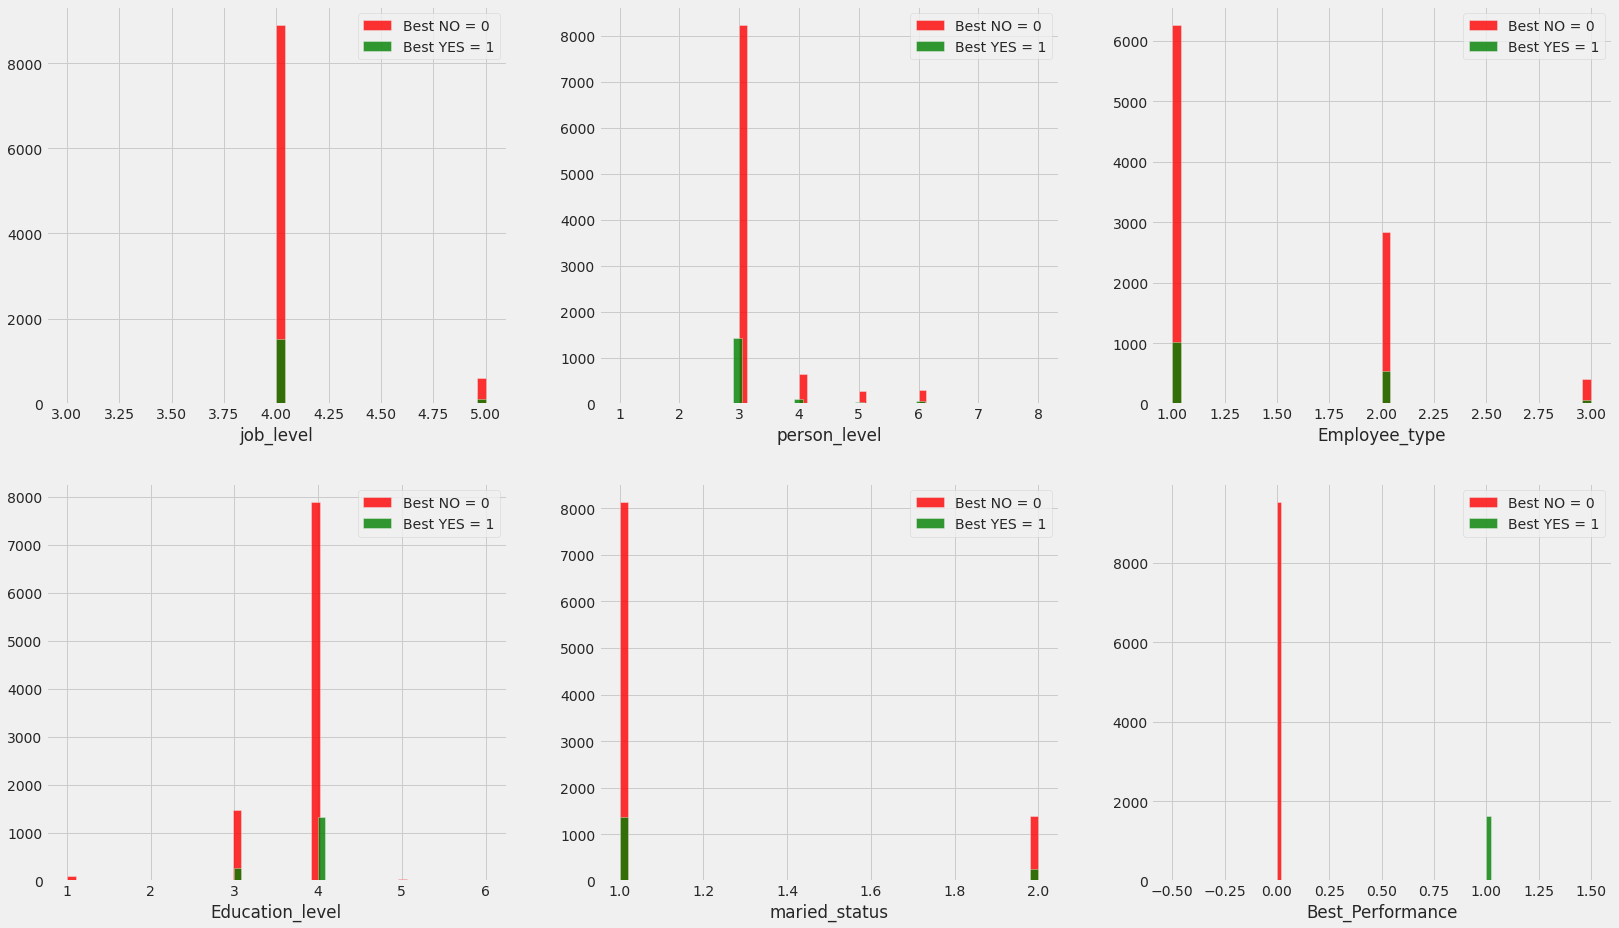

In [33]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(cat_df, 1):
    plt.subplot(2, 3, i)
    fn_df[fn_df["Best_Performance"] == 0][column].hist(bins=48, color='r', label='Best NO = 0', alpha=0.8)
    fn_df[fn_df["Best_Performance"] == 1][column].hist(bins=48, color='g', label='Best YES = 1', alpha=0.8)
    plt.legend()
    plt.xlabel(column)

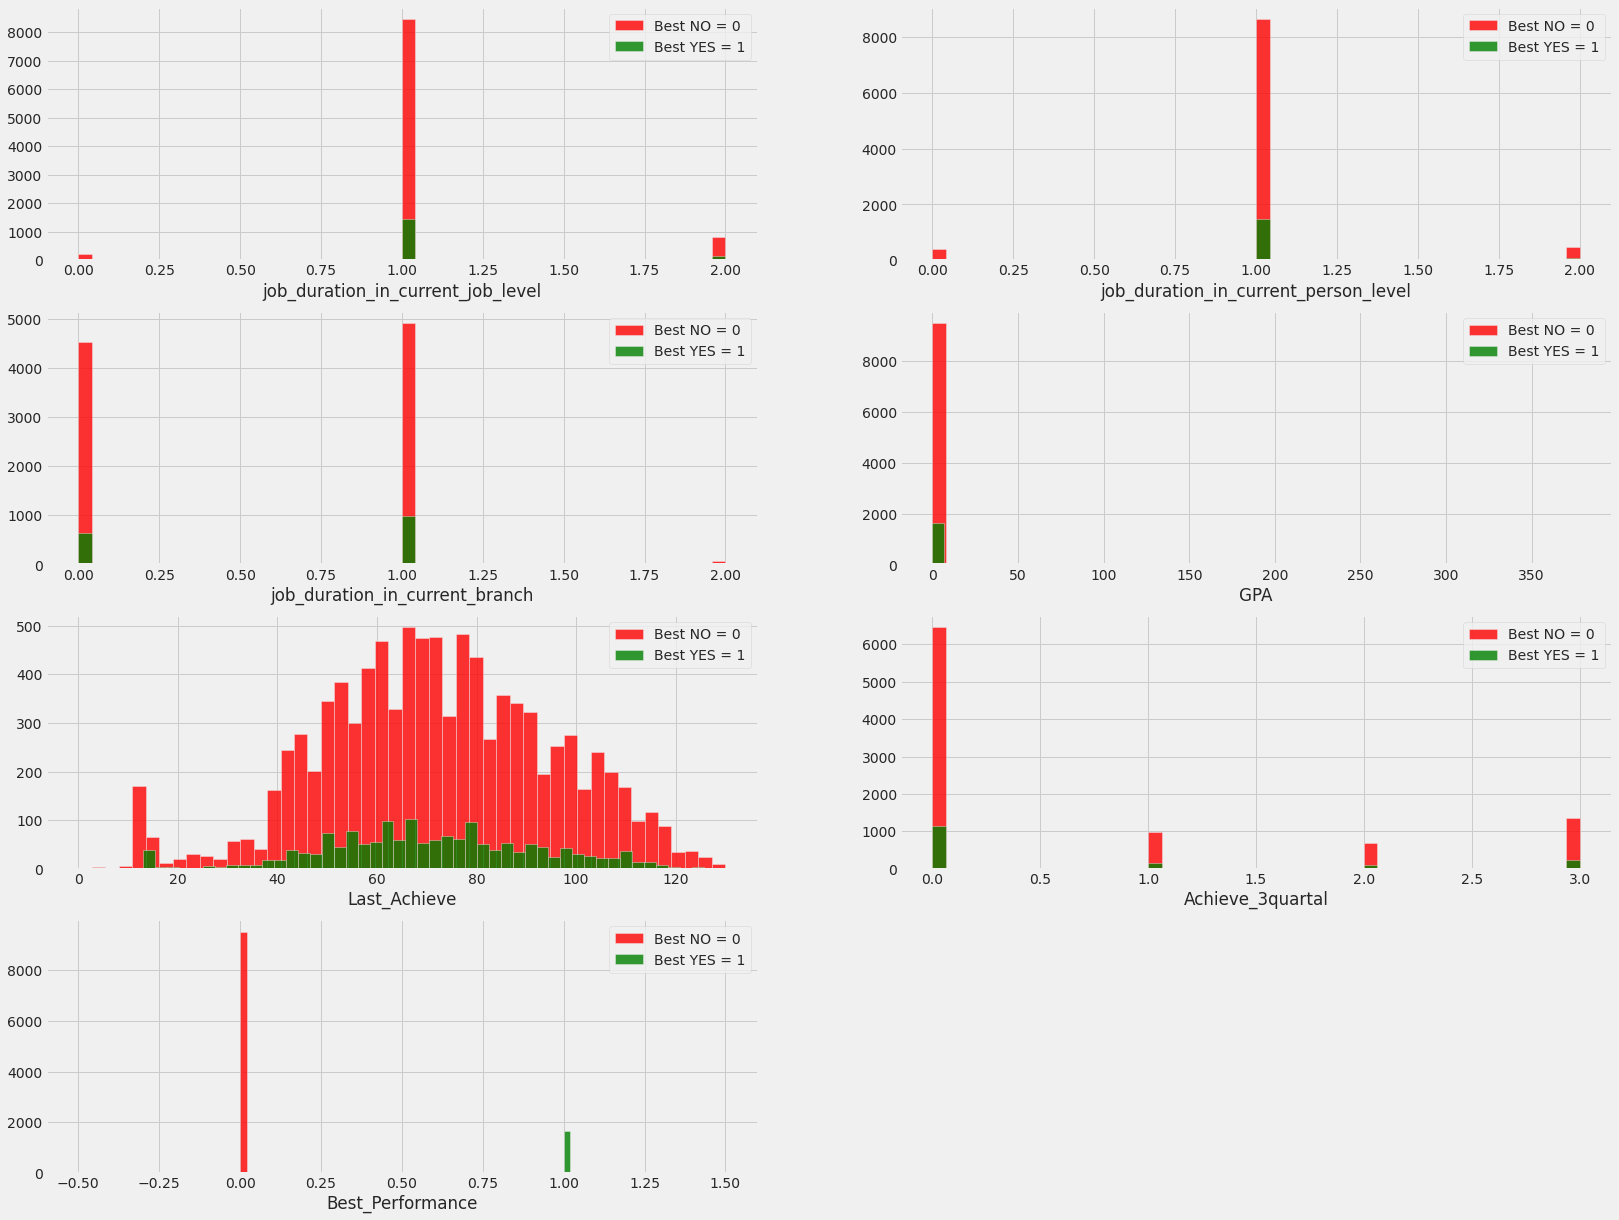

In [34]:
plt.figure(figsize=(25, 20))

for i, column in enumerate(flo_df, 1):
    plt.subplot(4, 2, i)
    fn_df[fn_df["Best_Performance"] == 0][column].hist(bins=48, color='r', label='Best NO = 0', alpha=0.8)
    fn_df[fn_df["Best_Performance"] == 1][column].hist(bins=48, color='g', label='Best YES = 1', alpha=0.8)
    plt.legend()
    plt.xlabel(column)

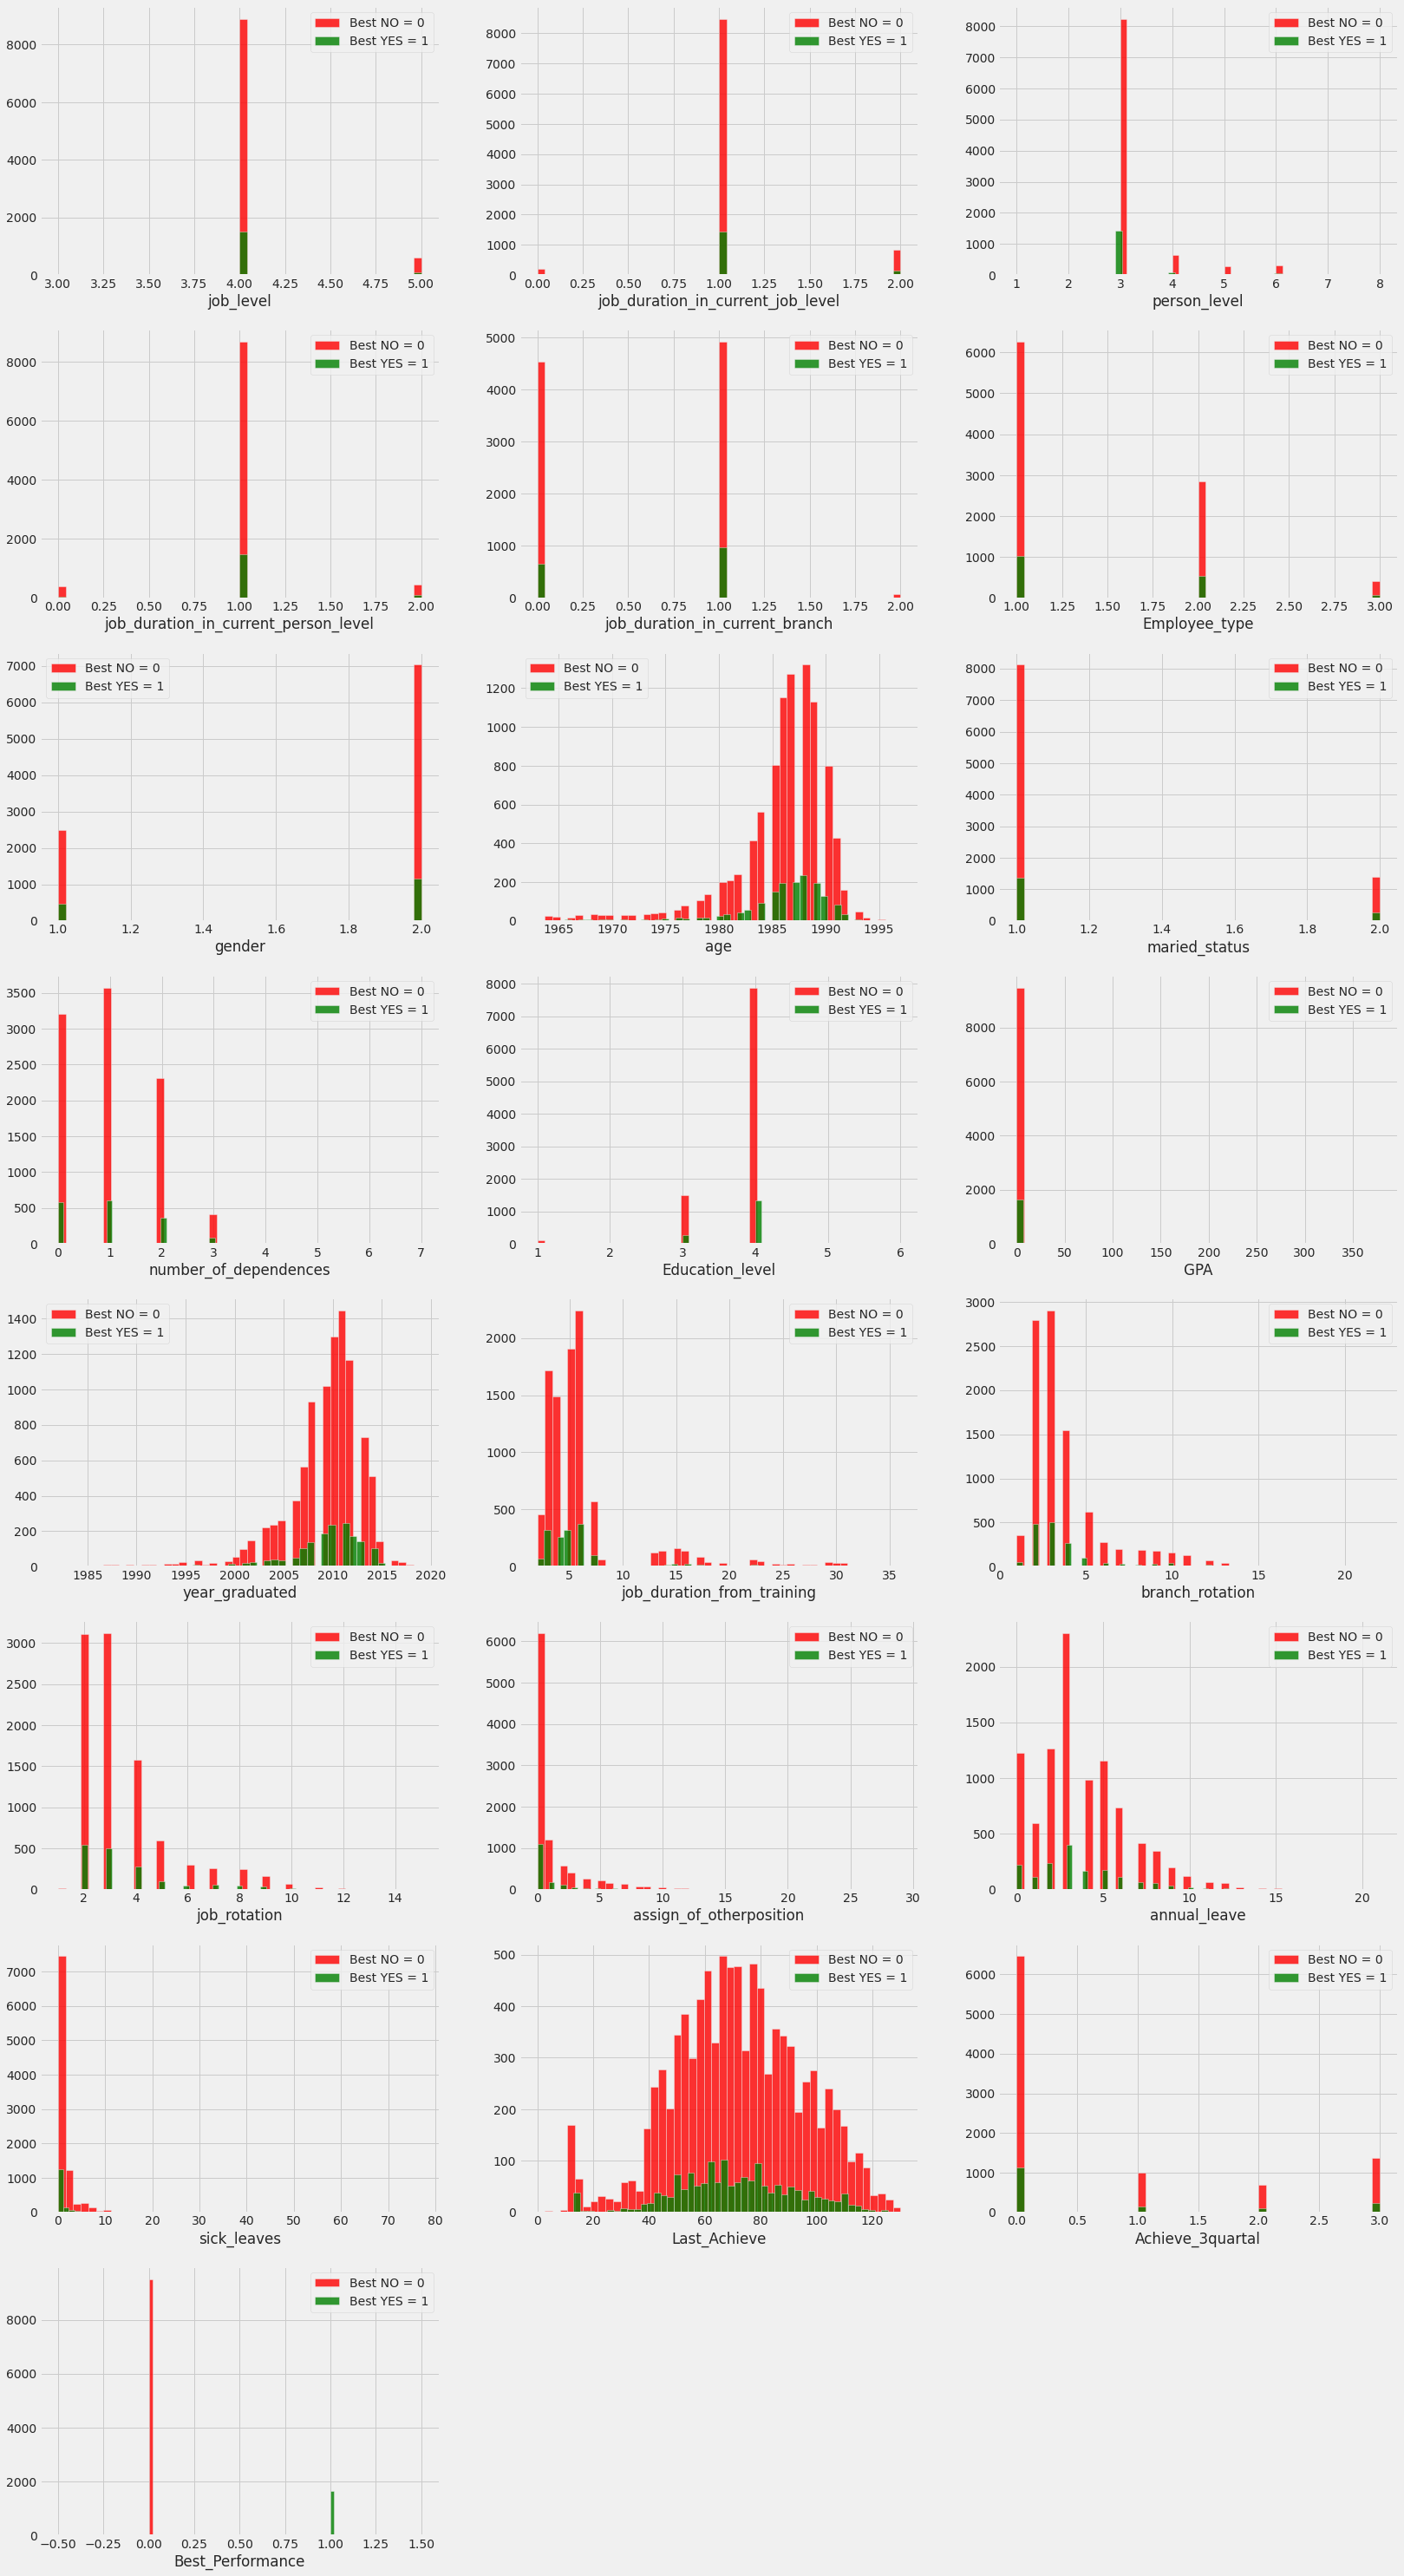

In [35]:
plt.figure(figsize=(25, 50))

for i, column in enumerate(fn_df, 1):
    plt.subplot(8, 3, i)
    fn_df[fn_df["Best_Performance"] == 0][column].hist(bins=48, color='r', label='Best NO = 0', alpha=0.8)
    fn_df[fn_df["Best_Performance"] == 1][column].hist(bins=48, color='g', label='Best YES = 1', alpha=0.8)
    plt.legend()
    plt.xlabel(column)

In [36]:
fn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   job_level                             11153 non-null  int64
 1   job_duration_in_current_job_level     11153 non-null  int64
 2   person_level                          11153 non-null  int64
 3   job_duration_in_current_person_level  11153 non-null  int64
 4   job_duration_in_current_branch        11153 non-null  int64
 5   Employee_type                         11153 non-null  int64
 6   gender                                11153 non-null  int64
 7   age                                   11153 non-null  int64
 8   maried_status                         11153 non-null  int64
 9   number_of_dependences                 11153 non-null  int64
 10  Education_level                       11153 non-null  int64
 11  GPA                                   111

In [37]:
# Machine Learning Algorithms : Test Model/Total Rows data set  6000/11152 = 0.537971846140052
#fn_df = fn_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

dummy_col = [column for column in fn_df.drop('Best_Performance', axis=1).columns if fn_df[column].nunique()]

winteam = pd.get_dummies(fn_df, columns=dummy_col, drop_first=False, dtype='uint8')
winteam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Columns: 431 entries, Best_Performance to Achieve_3quartal_3
dtypes: int64(1), uint8(430)
memory usage: 4.7 MB


In [38]:
print(winteam.shape)

# Remove duplicate Features
winteam = winteam.T.drop_duplicates()
winteam = winteam.T

# Remove Duplicate Rows
winteam.drop_duplicates(inplace=True)

print(winteam.shape)

(11153, 431)
(11153, 430)


In [39]:
# Korelasi terkuat antar variabel dimuali dari 10 % untuk mencapai "BEST PERFORMANCE"

feature_correlation = winteam.drop('Best_Performance', axis=1).corrwith(winteam.Best_Performance).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.009].index
len(model_col)

153

In [40]:
# Splitting data to training and testing
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

X = winteam.drop('Best_Performance', axis=1)
y = winteam.Best_Performance

# Data which use to "Training"  80 % and "Testing "  20 % (0.214) from cat_df dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.537971846140052, random_state=42)

In [41]:
# Deep Learning Metode ARTIFICIAL NEURAL NETWORKS

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)

In [42]:
# index = feature, Best Performance = importance
def feature_best_performance(tr_df, model):

    fi = pd.DataFrame()
    fi["index"] = winteam.columns
    fi["Best_Performance"] = model.feature_importances_
    return fi.sort_values(by="Best_Performance", ascending=False)

In [43]:
# Create Prediction Score, value of corelation is 39

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix 

def cetak_ann(label, prediction, train=True):
    if train:
        print("Train Result :\n====================winteam===========================")
        print(f"\t\t\tAccuracy Score      : {accuracy_score(label, prediction) *100:.2f}%")
        print("Train Matrix :\n_____________________________________________________________________")
        print(f"Confusion Matrix : \n {confusion_matrix(y_train,prediction)}\n")
        
    elif train==False:
        print("Test Result:\n====================winteam=============================")        
        print(f"\t\t\tAccuracy Score      : {accuracy_score(label, prediction) *100:.2f}%")
        print("Test Matrix :\n________________________________________________________________________")
        print(f"Confusion Matrix : \n {confusion_matrix(label, prediction)}\n")

In [44]:
## Deep Learning model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# define the keras model
model = Sequential()

model.add(Dense(X_train.shape[1],  activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
ann = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=10)

Epoch 1/40
516/516 [==============================] - 4s 6ms/step - loss: 0.4494 - accuracy: 0.8407 - val_loss: 0.4196 - val_accuracy: 0.8573
Epoch 2/40
516/516 [==============================] - 3s 5ms/step - loss: 0.3895 - accuracy: 0.8482 - val_loss: 0.4611 - val_accuracy: 0.8562
Epoch 3/40
516/516 [==============================] - 3s 5ms/step - loss: 0.3606 - accuracy: 0.8517 - val_loss: 0.4814 - val_accuracy: 0.8445
Epoch 4/40
516/516 [==============================] - 3s 5ms/step - loss: 0.3109 - accuracy: 0.8626 - val_loss: 0.5299 - val_accuracy: 0.8363
Epoch 5/40
516/516 [==============================] - 3s 5ms/step - loss: 0.2501 - accuracy: 0.8962 - val_loss: 0.7116 - val_accuracy: 0.8135
Epoch 6/40
516/516 [==============================] - 2s 4ms/step - loss: 0.1906 - accuracy: 0.9245 - val_loss: 0.8440 - val_accuracy: 0.8047
Epoch 7/40
516/516 [==============================] - 2s 4ms/step - loss: 0.1228 - accuracy: 0.9552 - val_loss: 1.0905 - val_accuracy: 0.7932
Epoch 

In [45]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

188/188 [==============================] - 1s 2ms/step - loss: 2.0324 - accuracy: 0.7993
Accuracy: 79.93


In [ ]:
model.summary()

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.plot(ann.history['loss'], label='Loss')
plt.plot(ann.history['val_loss'], label='Value Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ann.history['accuracy'], label='Accuracy')
plt.plot(ann.history['val_accuracy'], label='Value Accuracy')
plt.legend()

In [ ]:
ann_train_predict = model.predict(X_train)
ann_test_predict = model.predict(X_test)

cetak_ann(y_train, ann_train_predict.round(), train=True)
cetak_ann(y_test, ann_test_predict.round(), train=False)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

ann_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test)[:,0])

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label='Artificial Neural Network (area = %0.5f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

In [ ]:
roc_auc_score(y_test, model.predict(X_test)) # Target upper 60 %

In [ ]:
print(ann_test_predict[:,0])

In [ ]:
ann_test_predict.shape

In [ ]:
#Saved the prediction result to "submission.csv"
#kaggle competitions submit -c bri-data-hackathon-pa -f submission.csv -m "Win Team MIT 20"

subm_df = pd.read_csv('https://decko048.github.io/dataset/sample_submission.csv')
subm_df['Best Performance'] = ann_test_predict
subm_df.to_csv('submission.csv', index=False)